# K - Means clustering

#### importing required packages

In [266]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt


numpy.random.seed() helps to generate same random data after every execution.

In [283]:
n1=n.random.seed(0)
n.random.rand(4)
# print(n1)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318])

In [284]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
# print(x.shape,y.shape,"\n\n",x[0:10],"\n\n",y[0:10],"\n\n")
# s1=p.Series(y)
# print(s1.value_counts())
# print(type(x),type(y))


getting data into a dataframe

In [285]:
df=p.DataFrame()
df['x1']=x[:,0]
df['y1']=x[:,1]
df['labels']=y

print(df.head(10))

         x1        y1  labels
0 -2.161174 -2.396297       1
1  2.016842 -2.769896       2
2 -3.131012 -0.154347       1
3  1.515959 -3.201921       2
4  4.193716  3.094271       0
5  1.634308  1.432527       3
6  2.538392 -2.865306       2
7  1.701190  1.777240       3
8  4.143325  2.237306       0
9  1.149629  0.876300       3


### scatter plot

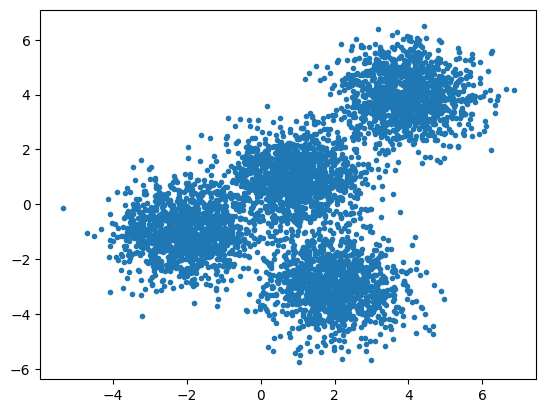

In [286]:
plt.scatter(x[:,0],x[:,1],marker='.')

scatter plot - separated with respective cluster center

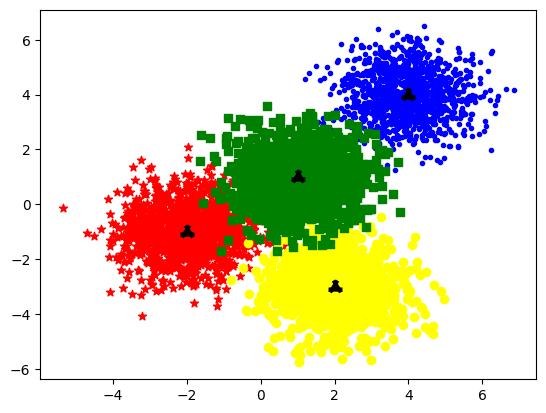

In [287]:

plt.scatter(df['x1'][df['labels']==0],df['y1'][df['labels']==0],color="blue",marker='.')
plt.scatter(df['x1'][df['labels']==1],df['y1'][df['labels']==1],color="red",marker='*')
plt.scatter(df['x1'][df['labels']==2],df['y1'][df['labels']==2],color="yellow",marker='o')
plt.scatter(df['x1'][df['labels']==3],df['y1'][df['labels']==3],color="green",marker='s')
# centers=[[4,4], [-2, -1], [2, -3], [1, 1]]

plt.scatter(4,4,marker='1',color='black',linewidths=10)
plt.scatter(-2,-1,marker='1',color='black',linewidths=10)
plt.scatter(2,-3,marker='1',color='black',linewidths=10)
plt.scatter(1,1,marker='1',color='black',linewidths=10)



### K - Means

In [288]:
from sklearn.cluster import KMeans
k_means=KMeans(init='k-means++',n_clusters=4,n_init=12)
k_means


KMeans(n_clusters=4, n_init=12)

In [289]:
k_means.fit(x)


KMeans(n_clusters=4, n_init=12)

In [295]:
k_means_labels=k_means.labels_
k_means_labels

array([3, 2, 3, ..., 1, 3, 0])

In [296]:
k_means_clusters=k_means.cluster_centers_
k_means_clusters


array([[ 3.9715783 ,  3.98554729],
       [ 0.96998589,  0.98265106],
       [ 1.99842025, -3.01515847],
       [-2.03851789, -0.99861421]])

adding new predicted labels to datafram

In [297]:
df['k_means_label']=k_means_labels
df.head(10)

,x1,y1,labels,k_means_label
0,-2.161174,-2.396297,1,3
1,2.016842,-2.769896,2,2
2,-3.131012,-0.154347,1,3
3,1.515959,-3.201921,2,2
4,4.193716,3.094271,0,0
5,1.634308,1.432527,3,1
6,2.538392,-2.865306,2,2
7,1.701190,1.777240,3,1
8,4.143325,2.237306,0,0
9,1.149629,0.876300,3,1


scatter plot - plotting data with new cluster centers

Text(0.5, 1.0, 'predicted')

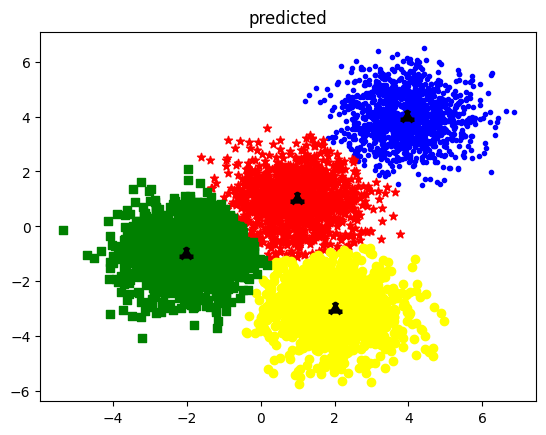

In [298]:

plt.scatter(df['x1'][df['k_means_label']==0],df['y1'][df['k_means_label']==0],color="blue",marker='.')
plt.scatter(df['x1'][df['k_means_label']==1],df['y1'][df['k_means_label']==1],color="red",marker='*')
plt.scatter(df['x1'][df['k_means_label']==2],df['y1'][df['k_means_label']==2],color="yellow",marker='o')
plt.scatter(df['x1'][df['k_means_label']==3],df['y1'][df['k_means_label']==3],color="green",marker='s')
plt.scatter(k_means_clusters[0,0],k_means_clusters[0,1],marker='1',color='black',linewidths=10)
plt.scatter(k_means_clusters[1,0],k_means_clusters[1,1],marker='1',color='black',linewidths=10)
plt.scatter(k_means_clusters[2,0],k_means_clusters[2,1],marker='1',color='black',linewidths=10)
plt.scatter(k_means_clusters[3,0],k_means_clusters[3,1],marker='1',color='black',linewidths=10)
plt.title('predicted')


scatter plot - plotting data with initial and predicted labels

Text(0.5, 1.0, 'initial')

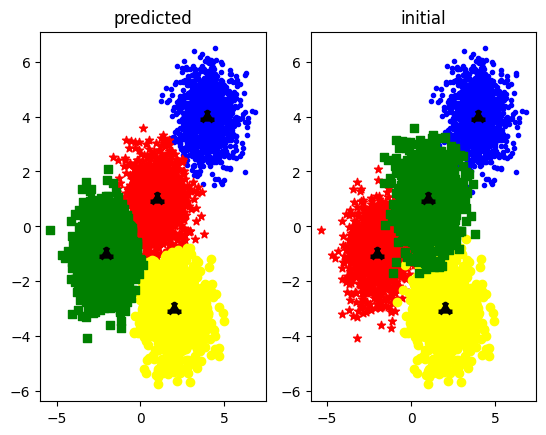

In [299]:
plt.subplot(1,2,1)
plt.scatter(df['x1'][df['k_means_label']==0],df['y1'][df['k_means_label']==0],color="blue",marker='.')
plt.scatter(df['x1'][df['k_means_label']==1],df['y1'][df['k_means_label']==1],color="red",marker='*')
plt.scatter(df['x1'][df['k_means_label']==2],df['y1'][df['k_means_label']==2],color="yellow",marker='o')
plt.scatter(df['x1'][df['k_means_label']==3],df['y1'][df['k_means_label']==3],color="green",marker='s')
plt.scatter(k_means_clusters[0,0],k_means_clusters[0,1],marker='1',color='black',linewidths=10)
plt.scatter(k_means_clusters[1,0],k_means_clusters[1,1],marker='1',color='black',linewidths=10)
plt.scatter(k_means_clusters[2,0],k_means_clusters[2,1],marker='1',color='black',linewidths=10)
plt.scatter(k_means_clusters[3,0],k_means_clusters[3,1],marker='1',color='black',linewidths=10)
plt.title('predicted')


plt.subplot(1,2,2)
plt.scatter(df['x1'][df['labels']==0],df['y1'][df['labels']==0],color="blue",marker='.')
plt.scatter(df['x1'][df['labels']==1],df['y1'][df['labels']==1],color="red",marker='*')
plt.scatter(df['x1'][df['labels']==2],df['y1'][df['labels']==2],color="yellow",marker='o')
plt.scatter(df['x1'][df['labels']==3],df['y1'][df['labels']==3],color="green",marker='s')
plt.scatter(4,4,marker='1',color='black',linewidths=10)
plt.scatter(-2,-1,marker='1',color='black',linewidths=10)
plt.scatter(2,-3,marker='1',color='black',linewidths=10)
plt.scatter(1,1,marker='1',color='black',linewidths=10)
plt.title('initial')


### performing k-means clustering with 3 cluster centers

In [300]:
k_means1=KMeans(init='k-means++',n_clusters=3,n_init=12)
k_means1.fit(x)
k_means1

KMeans(n_clusters=3, n_init=12)

In [301]:
k_means1_label=k_means1.labels_
k_means1_clusters=k_means1.cluster_centers_
k_means1_clusters

array([[-0.80855372, -0.17196347],
       [ 2.02128808, -2.94467063],
       [ 3.70078985,  3.69277139]])

adding new labels to our dataframe


In [302]:
df['k_means1_label']=k_means1_label
df.head()

,x1,y1,labels,k_means_label,k_means1_label
0,-2.161174,-2.396297,1,3,0
1,2.016842,-2.769896,2,2,1
2,-3.131012,-0.154347,1,3,0
3,1.515959,-3.201921,2,2,1
4,4.193716,3.094271,0,0,2


scatter plot - same dataframe with 3 cluster centers

Text(0.5, 1.0, 'predicted')

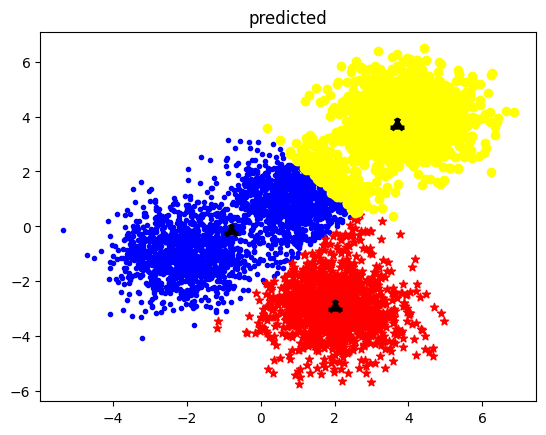

In [303]:
plt.scatter(df[df['k_means1_label']==0]['x1'],df[df['k_means1_label']==0]['y1'],color="blue",marker='.')
plt.scatter(df[df['k_means1_label']==1]['x1'],df[df['k_means1_label']==1]['y1'],color="red",marker='*')
plt.scatter(df[df['k_means1_label']==2]['x1'],df[df['k_means1_label']==2]['y1'],color="yellow",marker='o')
plt.scatter(k_means1_clusters[0,0],k_means1_clusters[0,1],marker='1',color='black',linewidths=10)
plt.scatter(k_means1_clusters[1,0],k_means1_clusters[1,1],marker='1',color='black',linewidths=10)
plt.scatter(k_means1_clusters[2,0],k_means1_clusters[2,1],marker='1',color='black',linewidths=10)
plt.title('predicted')


## reading data from csv

In [304]:
cust_df=p.read_csv('Cust_Segmentation.csv')
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [305]:
df1=cust_df.drop('Address',axis=1)
df1.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### normalising the data

In [306]:
from sklearn.preprocessing import StandardScaler
xc1=df1.values
xc1=xc1[:,1:]
xc1=n.nan_to_num(xc1)


X=StandardScaler().fit_transform(xc1)
X[0:10]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653],
       [ 0.61848622, -0.76634938,  2.13084447,  0.89107923, -0.27243814,
         1.39903102, -0.52379654,  0.10845868],
       [ 0.36962786,  0.31212243, -0.67404087,  0.24207204, -0.53413539,
        -0.77271955, -0.52379654, -1.27639982],
       [ 0.86734459,  1.39059423, -1.26454304,  0.44975434, -0.61085599,
         0.25501276, -0.52379654, -0.53185224],
       [-1.12352231, -0.76634938

In [307]:
cus_kmeans=KMeans(init='k-means++',n_clusters=3,n_init=12)
cus_kmeans.fit(X)
labels=cus_kmeans.labels_
clusters=cus_kmeans.cluster_centers_
labels.shape,clusters

((850,),
 array([[-1.50796609e-01, -1.15651304e-01, -1.38795179e-01,
         -2.73411279e-01, -3.40626044e-01, -3.71502176e-01,
         -5.23796543e-01, -3.28592133e-01],
        [ 9.91773769e-01,  2.38756999e-01,  1.27421461e+00,
          1.43518566e+00,  1.24440502e+00,  1.43538377e+00,
         -2.09335587e-01,  5.57517111e-01],
        [-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
         -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
          1.87982575e+00,  5.69270845e-01]]))

adding labels to the datafram

In [308]:
cust_df['labels']=labels
cust_df.head()
p.Series(labels).value_counts()

0    537
2    166
1    147
dtype: int64

In [309]:
cust_df.groupby('labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
labels,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


C:\Users\hemas\AppData\Local\Temp\ipykernel_14660\886923333.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(n.float), alpha=0.5)


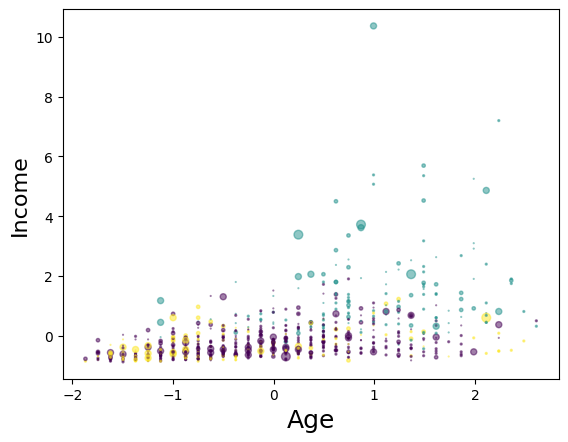

In [310]:
area = n.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(n.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


C:\Users\hemas\AppData\Local\Temp\ipykernel_14660\3351838077.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\hemas\AppData\Local\Temp\ipykernel_14660\3351838077.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(n.float))


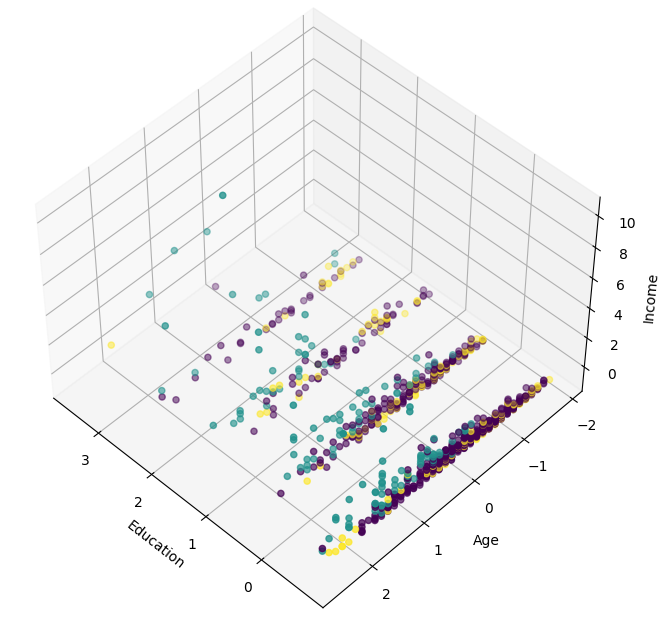

In [311]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(n.float))
